Extended Tasks

 * Basic problem statement
      * which month had the most animal articles in the past year, published in the past year
          * published-print
          * published-online 



In [1]:
import pandas as pd
import numpy as np

In [3]:
#load in the files collected by the API from the other jupyter notebook 
df = pd.read_json('craig2nd_test.json')

In [5]:
#look at data 
df.head()

,title,DOI,publisher_online,publisher_print,created,url,score,page,ISSN,subject,author_first,author_last,lang,container_title
7272,[Growth Management of Marecha Camel (Camelus d...,10.17582/journal.aavs/2020/8.11.1114.1119,"{'date-parts': [[2020, 8]]}",{'date-parts': [[2020]]},1598993795000,http://dx.doi.org/10.17582/journal.aavs/2020/8...,4.206729,none,[2307-8316],none,"[Asim, Muhammad, Abdul, Nasir Ali, Muhammad Sh...","[Faraz, Younas, Waheed, Tauqir, Nabeel, Mirza,...",none,[Advances in Animal and Veterinary Sciences]
7269,[Association between Bovine Leukemia Virus Inf...,10.17582/journal.aavs/2020/8.11.1109.1113,"{'date-parts': [[2020, 8]]}",{'date-parts': [[2020]]},1598993795000,http://dx.doi.org/10.17582/journal.aavs/2020/8...,4.206729,none,[2307-8316],none,"[Eman A., Marawan A., Abdelhamed, Abdelfattah]","[Manaa, Marawan, Abdelhady, Selim]",none,[Advances in Animal and Veterinary Sciences]
7274,[Slow Release Rbst Administration During the T...,10.17582/journal.aavs/2020/8.10.1079.1086,"{'date-parts': [[2020, 8]]}",{'date-parts': [[2020]]},1598993428000,http://dx.doi.org/10.17582/journal.aavs/2020/8...,3.591738,none,[2307-8316],none,"[Jefferson R., Tiago A. Dell, Caio S., Erika R...","[Gandra, Vale, Takiya, Gandra, Oliveira, Goes,...",none,[Advances in Animal and Veterinary Sciences]
7268,[Bone Marrow Metastasis in Inflammatory Mammar...,10.17582/journal.aavs/2020/8.10.1087.1090,"{'date-parts': [[2020, 8]]}",{'date-parts': [[2020]]},1598993428000,http://dx.doi.org/10.17582/journal.aavs/2020/8...,4.206729,none,[2307-8316],none,"[Miriã R. de, Tatiany L., Rubens A., Gleidice ...","[Oliveira, Silveira, Carneiro, Lavalle, Rodrig...",none,[Advances in Animal and Veterinary Sciences]
7275,[Assessment of Reproductive Efficiency and Her...,10.17582/journal.aavs/2020/8.10.1100.1108,"{'date-parts': [[2020, 8]]}",{'date-parts': [[2020]]},1598993428000,http://dx.doi.org/10.17582/journal.aavs/2020/8...,4.206729,none,[2307-8316],none,"[Hassan Mohamed, Abdirahman Bare, Muscub Moham...","[Hassan, Dubad, Muse, Ali, Ali]",none,[Advances in Animal and Veterinary Sciences]


# Publisher Online

In [13]:
#main issue was some of the publisher_online didn't have months
#we would only want stuff for this year as well the published_online is different from the created date
#which is how we collected the initial information 
publisher_date = []
for x in range(len(df['publisher_online'])):
    try:
        publisher_date.append(df['publisher_online'][x]['date-parts'][0])
    except:
        publisher_date.append('none')

In [16]:
#make new data frame 
df2 = pd.DataFrame(publisher_date)

In [19]:
#rename columns 
df2 = df2.rename(columns = {0:'year', 1: 'month', 2: 'day'})

In [22]:
#drop useless column 
df2 = df2.drop(columns = 3)

In [23]:
#look at new dataframe 
df2.head()

,year,month,day
0,2020,5,5
1,2020,5,5
2,2020,5,5
3,2020,5,5
4,2020,5,5


In [25]:
#keep 2020 year only 
df2020 = df2[df2['year'] == 2020]

In [29]:
#drop the none 'n' out 
df2020v2 = df2020[df2020['month'] != 'n']

In [31]:
from collections import Counter

In [37]:
#sort the count
article_month = pd.DataFrame(Counter(df2020v2['month']).items()).sort_values(by = 1, ascending = False)

In [41]:
#get rid of the nones
article_month[0] = article_month[0].replace(np.nan, 'none')
article_month = article_month[article_month[0] != 'none']

In [49]:
#for visualization 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [57]:
#rename columns 
article_month = article_month.rename(columns = {0:'month', 1:'count'})

In [69]:
#reset the index 
article_month = article_month.reset_index(drop = True)

In [70]:
#showing the count per month 
article_month

,month,count
0,6,1147
1,8,1004
2,4,975
3,1,913
4,7,908
5,2,884
6,5,846
7,3,844
8,9,36
9,12,23


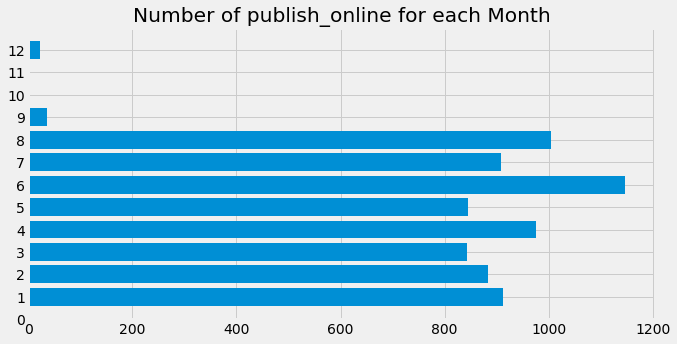

In [137]:
#visualizaton 
plt.figure(figsize = (10,5))
plt.barh(article_month['month'],article_month['count'])
plt.title('Number of publish_online for each Month')
plt.yticks(range(0,13));

# Publisher Print

In [71]:
#write for loop to pull out publisher date 
publisher_date_print = []
for x in range(len(df['publisher_print'])):
    try:
        publisher_date_print.append(df['publisher_print'][x]['date-parts'][0])
    except:
        publisher_date_print.append('none')

In [74]:
#change to dataframe
publish_print_df = pd.DataFrame(publisher_date_print)

In [81]:
#get rid of nones 
publish_print_df = publish_print_df[publish_print_df[0] != 'none']

In [83]:
#inspect 
publish_print_df

,0
5,[2020]
6,"[2020, 1, 31]"
7,"[2020, 1, 31]"
10,"[2020, 5, 5]"
14,"[2018, 6, 30]"
...,...
14826,"[2020, 2]"
14827,[1997]
14829,[1992]
14830,[1977]


In [87]:
#list to strings
publish_print_df[0] = [','.join(map(str, l)) for l in publish_print_df[0]]

<ipython-input-87-1c54ab6e1e30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publish_print_df[0] = [','.join(map(str, l)) for l in publish_print_df[0]]


In [136]:
#inspect
publish_print_df.head()

,0
5,2020
6,"2020,1,31"
7,"2020,1,31"
10,"2020,5,5"
14,"2018,6,30"


In [90]:
#expand out columns for year month and day
data = publish_print_df[0].str.split(',', expand=True)

In [92]:
#rename columns 
data = data.rename(columns = {0: 'year', 1: 'month', 2: 'day'})

In [116]:
#collect only 2020
datav2 = data[data['year'] == '2020'].reset_index(drop = True)

In [126]:
#get rid of nones
datav2 = datav2.fillna('none')

In [127]:
#choose rows that aren't none
datav3 = datav2[datav2['month'] != 'none']

In [133]:
#rename and do the count
df_count = pd.DataFrame(Counter(datav3['month']).items()).sort_values(by = 1, ascending = False)
df_count = df_count.rename(columns ={0:'month', 1: 'count'})

In [134]:
#show count 
df_count

,month,count
5,6,862
8,7,786
4,4,685
3,3,667
1,5,641
6,8,617
9,9,535
2,12,510
0,1,450
7,2,350


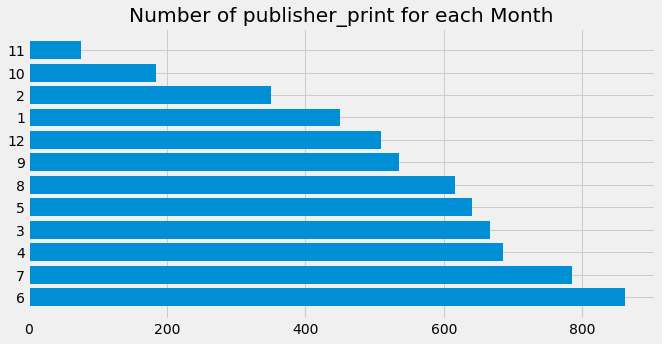

In [135]:
#visualizaton 
plt.figure(figsize = (10,5))
plt.barh(df_count['month'],df_count['count'])
plt.title('Number of publisher_print for each Month')
plt.yticks(range(0,13));